# Titanic - DummyClassifier e Features Numéricas
Este notebook cria um modelo de benchmark baseado no dataset do Titanic e usando um DummyClassifier. Para esse caso específico, estamos usando apenas features numéricas e o nosso modelo faz previsões baseado na classe predominante.

Vamos começar importando as bibliotecas básicas que vamos usar.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Próximo passo: carregando os dados a partir dos CSVs disponibilizados no Kaggle. Estamos usando a biblioteca pandas para esse propósito.

In [26]:
# Vamos iniciar o notebook importanto o Dataset
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")

# Podemos observar as primeiras linhas dele.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos usar a biblioteca scikit-learn para treinar um modelo. Como a maior parte das bibliotecas para Machine Learning, o tratamento é de dados numéricos. Dessa forma, vamos isolar as colunas numéricas. As colunas não numéricas serão tratadas no futuro.

A Feature `Age` também é numérica, mas algumas linhas não estão preenchidas. Vamos tratá-la posteriormente junto com as colunas não numéricas.


In [27]:
numeric_features = ['Pclass', 'SibSp', 'Parch', 'Fare']

É possível isolar apenas um subcojunto das colunas do DataFrame pandas, passando uma lista como index da subscription.

In [28]:
titanic_df[numeric_features].head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


Apesar de usarmos pandas para ler e manipular os dados, a biblioteca scikit-learn trabalha os dados como se fossem matrizes e arrays numpy. Vamos portanto converter os dados que nos interessam em matrizes e arrays numpy.

Como convenção, normalmente representa-se as features do modelo com o nome `X` e a variável alvo, que estamos tentando prever, de `y`.

In [29]:
train_X = titanic_df[numeric_features].as_matrix()
print(train_X.shape)
train_y = titanic_df['Survived'].as_matrix()
print(train_y.shape)

(891, 4)
(891,)


Ok. A matriz `train_X` tem 891 linhas e 4 colunas. O array `train_y` tem 891 valores, representando cada uma das 891 amostras. Vamos visualizá-los, apenas para fins didáticos.

In [30]:
train_X

array([[  3.    ,   1.    ,   0.    ,   7.25  ],
       [  1.    ,   1.    ,   0.    ,  71.2833],
       [  3.    ,   0.    ,   0.    ,   7.925 ],
       ..., 
       [  3.    ,   1.    ,   2.    ,  23.45  ],
       [  1.    ,   0.    ,   0.    ,  30.    ],
       [  3.    ,   0.    ,   0.    ,   7.75  ]])

In [31]:
train_y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

Agora que temos os dados, vamos criar o modelo mais bobo possível. Nosso objetivo é nos habituarmos com o workflow e a API do SKLearn, nem tanto com a qualidade do modelo.

Vamos construir um modelo que responde sempre a mesma coisa: a classe predominante.

O que é a classe predominante? Bem... nosso problema só tem 2 classes nesse caso: ou o passageiro é um sobervivente (Survived=1) ou não é um sobrevivente (Survived=0). Nesse dataset, infelizmente a maior parte das pessoas não sobreviveu.

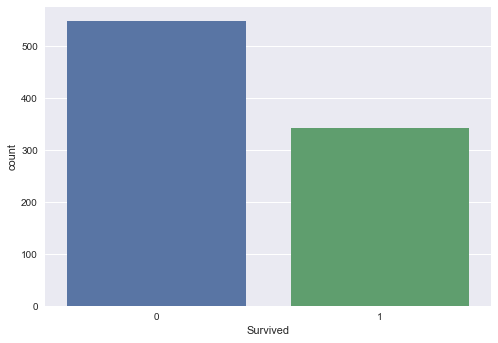

In [32]:
import seaborn as sns
sns.countplot(titanic_df['Survived']);

Mas nós não vamos dizer isso pra classificador! Nós vamos passar os dados pra ele e ele vai aprender qual é a classe predominante. O método que faz o aprendizado (ou treinamento) no sklearn é o fit.

Vamos começar então criando a estrutura do modelo.

In [33]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')

Criamos a estrutura básica do modelo. Hora de treiná-lo. Vamos alimentá-lo com as features (características de cada passageiro) e o rótulo (ou alvo) - que determina se aquele dado passageiro sobreviveu ou não. Vamos usar o método fit.

In [34]:
dummy_clf.fit(train_X, train_y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Com nosso modelo treinado, o próximo passo é avaliar a qualidade dele. Esse modelo de Classifier usa como métrica de score a acurácia, ou seja: qual a taxa de acerto. Vamos ver a acurácia nesse dataset de treinamento.

In [35]:
dummy_clf.score(train_X, train_y)

0.61616161616161613

Bem, esse vai ser nosso benchmark inicial. O modelo mais simples possível (que prevê sempre a classe predominante) tem ~61% de acurácia. Já é melhor que cara-ou-coroa. Nossa meta é avançar.

Agora que temos o nosso modelo treinado, como fazemos pra fazer uma previsão? Basicamente nós temos que informar as características do passageiro e ele vai nos dizer se o passageiro sobreviveu ou não. Isso é feito usando o método predict. 

Pra fazer um breve teste, vamos prever com esse modelo os últimos 5 passageiros desse dataset.

In [36]:
train_X[-5:]

array([[  2.  ,   0.  ,   0.  ,  13.  ],
       [  1.  ,   0.  ,   0.  ,  30.  ],
       [  3.  ,   1.  ,   2.  ,  23.45],
       [  1.  ,   0.  ,   0.  ,  30.  ],
       [  3.  ,   0.  ,   0.  ,   7.75]])

In [37]:
train_y[-5:]

array([0, 1, 0, 1, 0], dtype=int64)

In [38]:
dummy_clf.predict(train_X[-5:])

array([0, 0, 0, 0, 0], dtype=int64)

Ok, já sabemos como usar o modelo para prever se um determinado passageiro sobreviveria, com base em algumas de suas características (features). O próximo passo é trabalhar com o dataset de teste que o Kaggle nos disponibiliza. Vamos extrair as features (características) desse dataset, passar pelo modelo e os resultados serão submetidos no Kaggle.

In [39]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


O dataset de test é muito parecido com o dataset de treinamento (ainda bem!). A diferença aqui é que falta a coluna Survived, que é justamente a que precisamos prever. Vamos começar a preparar os dados.

Infelizmente no dataset de teste, um dos passageiros está com Fare vazio. :-(

Para conseguirmos evoluir, vamos setar o Fare vazio para 0.0

In [40]:
test_df['Fare'] = test_df['Fare'].fillna(0)

Lembra que o sklean trabalha com matrizes numpy, certo?

In [41]:
test_X = test_df[numeric_features].as_matrix()
print(test_X.shape)

(418, 4)


In [42]:
test_X

array([[  3.    ,   0.    ,   0.    ,   7.8292],
       [  3.    ,   1.    ,   0.    ,   7.    ],
       [  2.    ,   0.    ,   0.    ,   9.6875],
       ..., 
       [  3.    ,   0.    ,   0.    ,   7.25  ],
       [  3.    ,   0.    ,   0.    ,   8.05  ],
       [  3.    ,   1.    ,   1.    ,  22.3583]])

Legal. Temos 418 amostras. Vamos usar o nosso modelo pra prever a sobrevivência dessas 418 pessoas.

In [43]:
y_pred = dummy_clf.predict(test_X)

In [44]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

Ótimo! Já temos aquilo que precisávamos. Não é muito impressionante, mas nosso objetivo é testar o fluxo. Próximo passo agora é empacotar num arquivo CSV e submeter no Kaggle.

In [45]:
sample_submission_df = pd.DataFrame()

In [46]:
sample_submission_df['PassengerId'] = test_df['PassengerId']
sample_submission_df['Survived'] = y_pred
sample_submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [47]:
sample_submission_df.to_csv('basic_dummy_classifier.csv', index=False)

Por favor, anote aqui para referência: quanto foi o seu score de treinamento do modelo? Quanto foi o seu score na submissão do Kaggle?

In [48]:
CV=0.61616
LB=0.62679